# Домашнее задание по дисциплине
# "Инструментальные средства моделирования"
## Выполнил:
## Корнеев А.В. БПМ-152
### Вариант 12

Зона 2 границы детали F закреплена, а зона 1 равномерно нагружена усилием P (Н/$см^2$) под углом $-90^\circ$. Деталь задана следующими параметрами: L, H, W, R = 10, 10, 6, 4 см и толщиной t = 1 см. При условии сохранения упругости деформации определить наибольшую величину усилия P, если деталь изготовлена из стали №1.

Для стали №1:

E = 200 ГПа

$\mu$ = 0.27

$\sigma_T$ = 300 МПа

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt
%matplotlib inline

![Image of part](https://raw.githubusercontent.com/alxkorn/ISM/master/pic1.png)

## Построение фигуры

Расположим деталь в декартовой систнме координат, так чтобы верхний левый угол оказался в точке (0,0). Сначала построим дуги детали. Верхняя дуга детали будет задаваться дугой окружности с центром в точке $C = \big( \frac{L}{2}, -\frac{H}{2}+ \frac{W}{2}+R\big)$. Найдем точки, в которых эта окружность пересекается с осью абсцисс. Для этого запишем уравнение соответсвующей окружности и решим его относительно x при y=0. 

$$\big(x- \frac{L}{2}\big)^2 + \big(y- \big(  -\frac{H}{2}+ \frac{W}{2}+R\big)\big)^2=R^2$$

При y=0 получаем:

$$x_{1,2}=\frac{L}{2} \pm \sqrt{R^2- \big(  -\frac{H}{2}+ \frac{W}{2}+R\big)^2}$$

In [34]:
L = 10
H = 10
W = 6
R = 4
s = 11

In [8]:
c11 = -np.sqrt(R**2-(-H/2+W/2+R)**2)+L/2
c11

1.5358983848622456

In [9]:
c12 = np.sqrt(R**2-(-H/2+W/2+R)**2)+L/2
c12

8.464101615137753

Рассмторим треугольник с вершинами в точках С, A = ($x_2$,0), B = ($x_1$,0)

Text(5,2,'C - центр окружности')

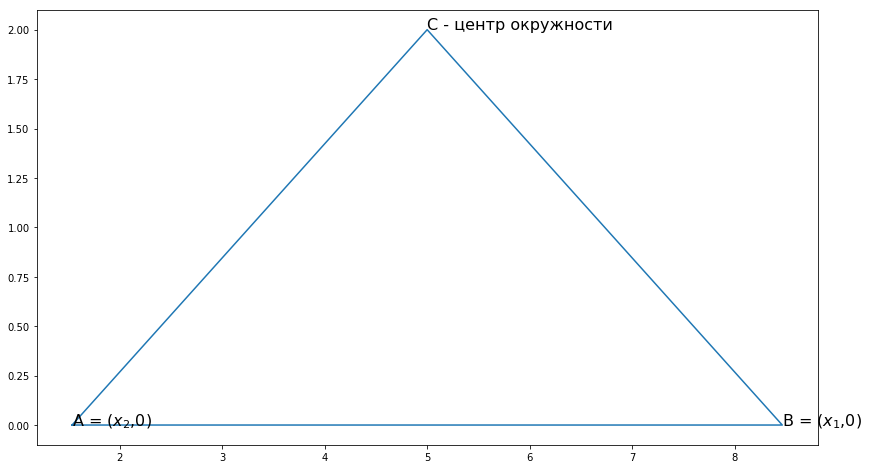

In [24]:
plt.figure(figsize=(14,8))
plt.plot([c11,L/2,c12,c11],[0,-H/2+W/2+R,0,0])
plt.text(c11,0,'A = ($x_2$,0)',fontsize=16)
plt.text(c12,0,'B = ($x_1$,0)',fontsize=16)
plt.text(L/2,-H/2+W/2+R,'C - центр окружности',fontsize=16)

Это равнобедренный треугольник со сторонами AC=AB=R, AB = $x_1-x_2$.

Тогда $\angle ABC = 2arcsin\left(\frac{|AB|}{2R} \right)$

In [25]:
np.degrees(2*np.arcsin((c12-c11)/(2*R)))

119.99999999999997

In [40]:
R1 = c12-c11

Таким образом нашли углы дуг детали. Теперь, зная их центры, легко построить эти дуги.

In [29]:
def create_arc(c,r,a1,a2,s):
    alpha = np.radians(np.linspace(a1,a2,s))
    x = r*np.cos(alpha) + c[0]
    y = r*np.sin(alpha) + c[1]
    
    return np.hstack((x.reshape(-1,1),y.reshape(-1,1)) )

In [71]:
split_arc1 = create_arc([L/2,-H/2+W/2+R],R,330,210,26)
split_arc2 = create_arc([L/2,-H/2-W/2-R],R,150,30,26)

In [214]:
def show_parts(*parts,col='b'):
    plt.figure(figsize=(14,8))
    plt.grid(True)
    plt.axis('equal')
    for part in parts:
        plt.plot(part[:,0],part[:,1],'.-',c=col)

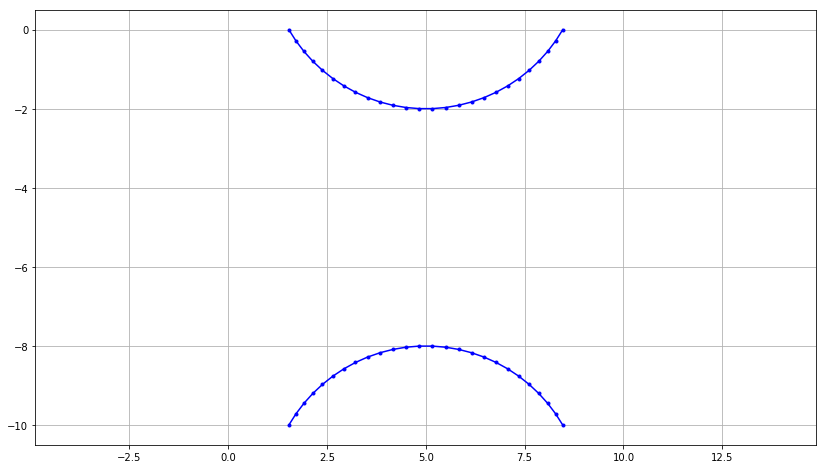

In [218]:
show_parts(split_arc1,split_arc2)

Заметим, что было соблюдено условие W=6.

Построение остальной части фигуры - тривиально.

In [74]:
def split_border(Nodes,N,closed=False):
    points_x = np.array([])
    points_y = np.array([])
    for i in range(Nodes.shape[0]-2):
        points_x = np.append(points_x, np.linspace(Nodes[i,0],Nodes[i+1,0],N[i])[:-1])
        points_y = np.append(points_y,np.linspace(Nodes[i,1],Nodes[i+1,1],N[i])[:-1])
        
    if not closed:   
        points_x = np.append(points_x,np.linspace(Nodes[-2,0],Nodes[-1,0],N[-1]))
        points_y = np.append(points_y,np.linspace(Nodes[-2,1],Nodes[-1,1],N[-1]))
    if closed:
        points_x = np.append(points_x,np.linspace(Nodes[-2,0],Nodes[-1,0],N[-1])[:-1])
        points_y = np.append(points_y,np.linspace(Nodes[-2,1],Nodes[-1,1],N[-1])[:-1])
    
    
    return np.hstack((points_x.reshape(-1,1),points_y.reshape(-1,1)) )

In [75]:
stp = [split_arc1[-1][0],0]

In [76]:
stp2 = [split_arc2[-1][0],-H]

In [77]:
bbord = np.array([stp,
         [stp[0]-(L-R1)/2,stp[1]],
         [stp[0]-(L-R1)/2,stp[1]-H],
         [stp[0],stp[1]-H]])
fbord = np.array([stp2,
                 [stp2[0]+(L-R1)/2,stp2[1]],
                 [stp2[0]+(L-R1)/2,stp2[1]+H],
                 [stp2[0],stp2[1]+H]])

In [82]:
split_bbord = split_border(bbord,[8,21,8])[1:-1]
split_fbord = split_border(fbord,[8,21,8])[1:-1]

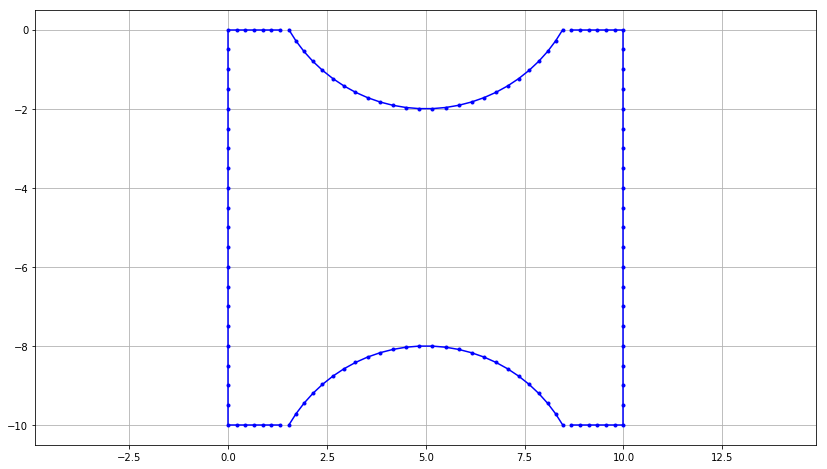

In [83]:
show_parts(split_arc1,split_bbord,split_arc2,split_fbord)

In [84]:
border = np.vstack((split_arc1,split_bbord,split_arc2,split_fbord))

## Построение триангуляции

In [89]:
delta = 0.25

In [168]:
X,Y = np.meshgrid(np.linspace(delta,L-delta,31),np.linspace(0-delta,-L+delta,31))

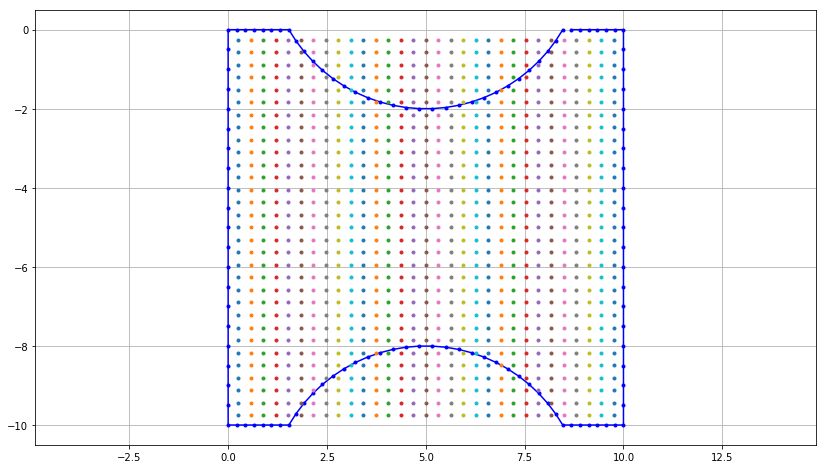

In [169]:
show_parts(border)
plt.plot(X,Y,'.');

In [170]:
inner = np.vstack((X.ravel(),Y.ravel())).T
inner.shape

(961, 2)

In [171]:
delta2 = 0.1

In [172]:
mask1 = np.sum((inner-np.array([L/2,-H/2+W/2+R]))**2,axis=1) > (R+delta2)**2
mask2 = np.sum((inner-np.array([L/2,-H/2-W/2-R]))**2,axis=1) > (R+delta2)**2

In [173]:
inner = inner[mask1 & mask2]

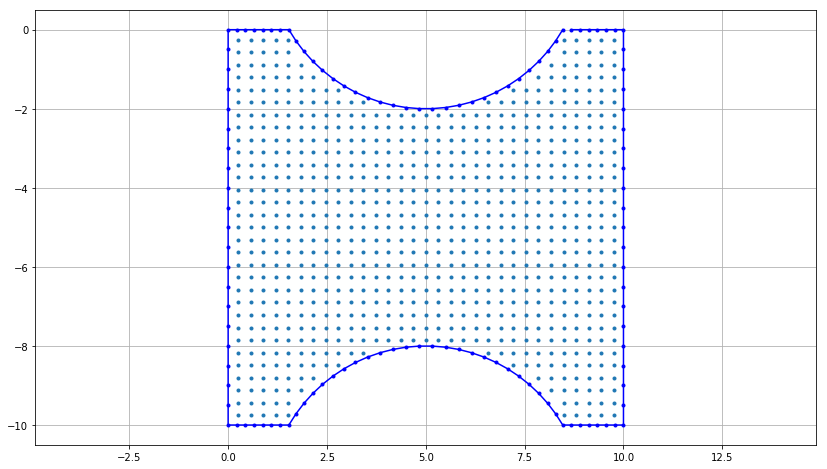

In [174]:
show_parts(border)
plt.plot(inner[:,0],inner[:,1],'.')

In [175]:
Nodes = np.vstack((border,inner))

In [176]:
Nodes.shape

(879, 2)

In [177]:
trng = scipy.spatial.Delaunay(Nodes)

(-0.5000000000000006, 10.500000000000002, -10.5, 0.5)

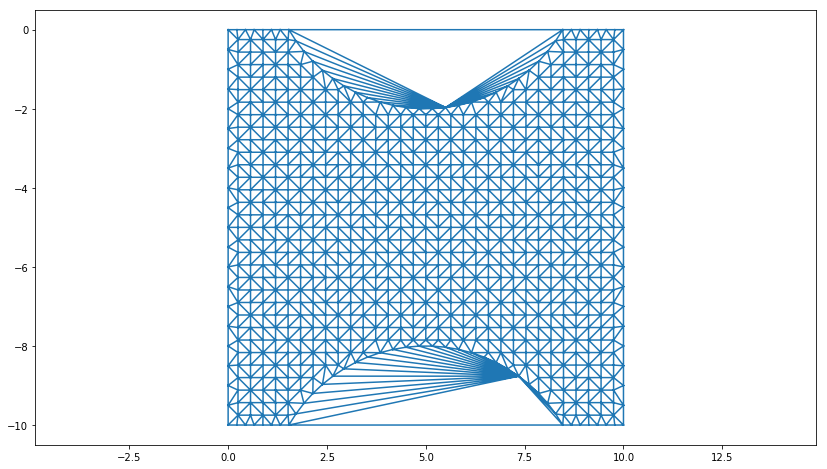

In [178]:
plt.figure(figsize=(14,8))
plt.triplot(Nodes[:,0],Nodes[:,1],trng.simplices.copy())
plt.axis('equal')

In [179]:
trng_vertices = Nodes[trng.simplices]

In [180]:
trng_x_verices = trng_vertices[:,:,0]

In [181]:
trng_y_verices = trng_vertices[:,:,1]

In [182]:
trng_x_mean = np.mean(trng_x_verices,axis=1)
trng_y_mean = np.mean(trng_y_verices,axis=1)

In [183]:
trng_centers = np.hstack((trng_x_mean.reshape(-1,1),trng_y_mean.reshape(-1,1)))

In [187]:
delta2 = 0.01
mask_tri1 = np.sum((trng_centers - np.array([L/2,-H/2+W/2+R]))**2, axis=1) > (R+delta2)**2
mask_tri2 = np.sum((trng_centers - np.array([L/2,-H/2-W/2-R]))**2, axis=1) > (R+delta2)**2

In [189]:
simplices = trng.simplices.copy()
simplices = simplices[mask_tri1 & mask_tri2]

(-0.5000000000000006, 10.500000000000002, -10.5, 0.5)

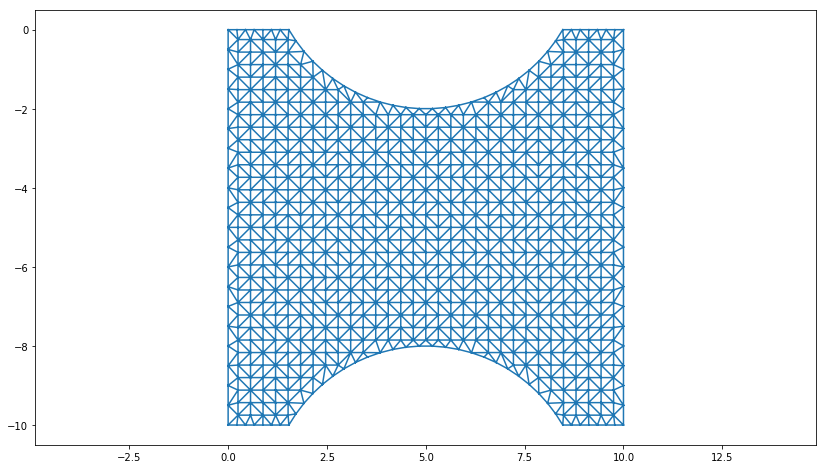

In [190]:
plt.figure(figsize=(14,8))
plt.triplot(Nodes[:,0],Nodes[:,1],simplices)
plt.axis('equal')

In [400]:
def triarea(a, b, c):
    ab = b - a
    ac = c - a
    return 0.5 * (ab[:,0]*ac[:,1] - ab[:,1]*ac[:,0])

In [401]:
trng_vertices2 = Nodes[simplices] # Пересчитаем, т.к. надо учитывать маски
A = triarea(trng_vertices2[:,0], trng_vertices2[:,1], trng_vertices2[:,2])
A.shape

(1638,)

In [402]:
b = trng_vertices2[:, [1,2,0], 1] - trng_vertices2[:, [2, 0, 1], 1]
b

array([[ 0.25      , -0.5       ,  0.25      ],
       [-0.06666667,  0.31666667, -0.25      ],
       [ 0.02803252, -0.18154119,  0.15350868],
       ...,
       [ 0.        ,  0.31666667, -0.31666667],
       [-0.31666667,  0.31666667,  0.        ],
       [-0.31666667,  0.        ,  0.31666667]])

In [403]:
c = trng_vertices2[:, [2,0,1],0] - trng_vertices2[:,[1,2,0],0]
c

array([[ 0.25      ,  0.        , -0.25      ],
       [-0.25      ,  0.        ,  0.25      ],
       [ 0.33383032, -0.18466627, -0.14916405],
       ...,
       [-0.31666667,  0.31666667,  0.        ],
       [ 0.        , -0.31666667,  0.31666667],
       [ 0.31666667, -0.31666667,  0.        ]])

In [404]:
z = np.zeros_like(b[:,0])
z.shape

(1638,)

In [405]:
#B1 = np.array([b[0], 0, b[1], 0, b[2], 0])
B1 = np.stack((b[:,0], z, b[:,1], z, b[:,2], z), axis=1)
B2 = np.stack((z, c[:,0], z, c[:,1], z, c[:,2]), axis=1)
B3 = np.stack((c[:,0], b[:,0], c[:,1], b[:,1], c[:,2], b[:,2]), axis=1)
print(B1.shape)
print(B2.shape)
print(B3.shape)

(1638, 6)
(1638, 6)
(1638, 6)


In [406]:
B = np.stack((B1, B2, B3), axis=1)
B.shape

(1638, 3, 6)

In [407]:
# Каждую матрицу 3х6 надо умножить на свой коэффициент
# Определим это коэффициент (две площади элемента, которому она соответствует)
coef = 1/(2*A)
coef.shape

(1638,)

In [408]:
B *= coef.reshape(-1, 1, 1)
B.shape

(1638, 3, 6)

In [628]:
# 200 ГПа = 200*10^9 Па = 200*10^9 Н/м^2 = 200*10^9/10^4 Н/см^2

In [491]:
# Модуль Юнга
E = 2e7 # Н/см^2
mu = 0.27 # коэффициент Ламэ, безразмерный
t = 1 # cm
P = 20e3 # Н/см^2

In [492]:
D = E / (1 - mu**2)*np.array([[1,mu,0], [mu,1,0], [0,0,0.5*(1-mu)]])

In [493]:
D

array([[21572645.8850178 ,  5824614.38895481,        0.        ],
       [ 5824614.38895481, 21572645.8850178 ,        0.        ],
       [       0.        ,        0.        ,  7874015.7480315 ]])

In [494]:
BT = np.transpose(B, axes=(0,2,1))
BT.shape

(1638, 6, 3)

In [495]:
# Матрица жесткостей для всех элементов
Ke = np.matmul(np.matmul(BT, D), B)*t*A.reshape(-1, 1, 1)
Ke.shape

(1638, 6, 6)

In [496]:
coords0 = simplices[:, 0].reshape(-1, 1)
coords1 = simplices[:, 1].reshape(-1, 1)
coords2 = simplices[:, 2].reshape(-1, 1)

In [497]:
EFT = np.hstack((coords0*2, coords0*2+1, coords1*2, coords1*2+1, coords2*2, coords2*2+1))
EFT

array([[ 184,  185, 1756, 1757,  182,  183],
       [1756, 1757,  184,  185, 1736, 1737],
       [1556, 1557,  144,  145,  146,  147],
       ...,
       [1578, 1579, 1516, 1517, 1514, 1515],
       [1578, 1579, 1580, 1581, 1518, 1519],
       [1516, 1517, 1578, 1579, 1518, 1519]], dtype=int32)

In [498]:
EFT.shape

(1638, 6)

In [499]:
Nn = Nodes.shape[0]
K = np.zeros((2*Nn, 2*Nn))

In [500]:
# i -- номер элемента
for i in range(simplices.shape[0]):
    K[EFT[i, np.newaxis].T,EFT[i]] += Ke[i]

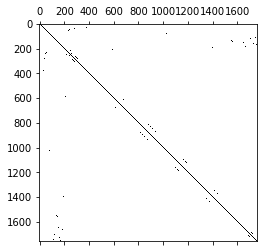

In [501]:
plt.spy(K)

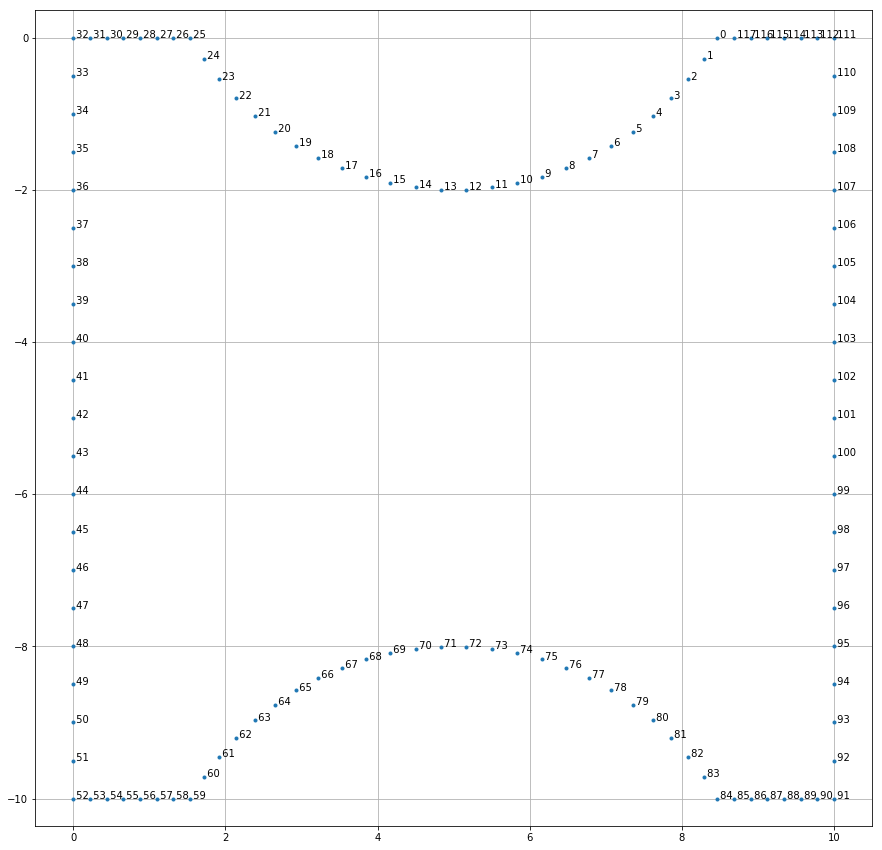

In [502]:
plt.figure(figsize=(15,15))
plt.plot(border[:,0], border[:,1], '.')
for i, p in enumerate(border):
    plt.text(p[0], p[1], ' %d'%i)
plt.axis('equal')
plt.grid(True)

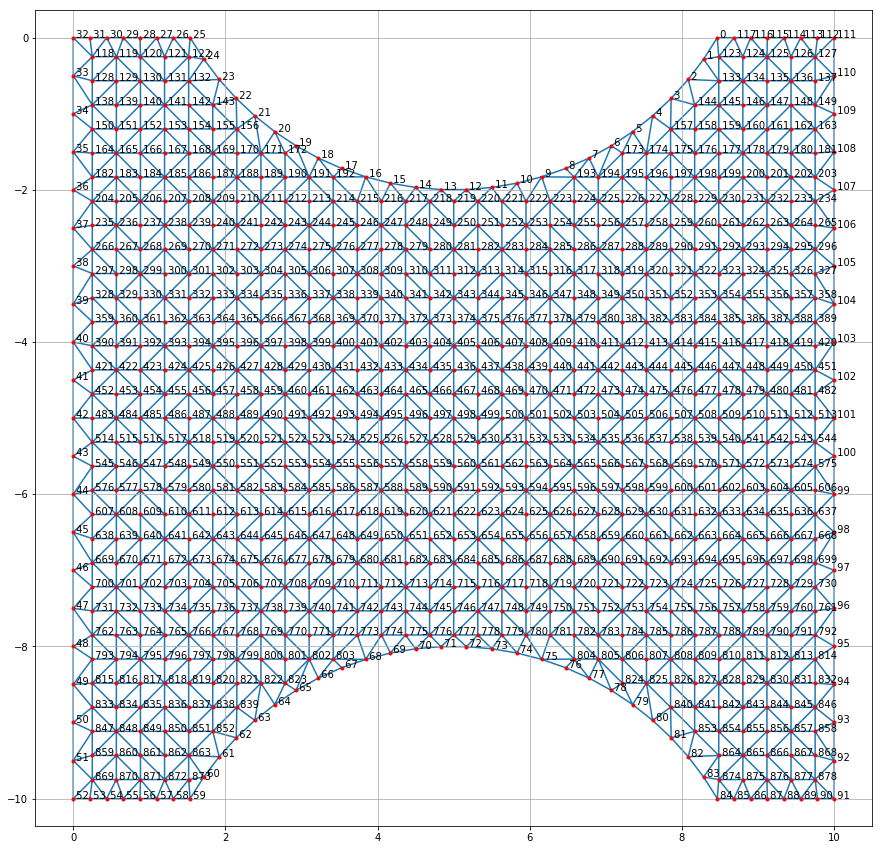

In [503]:
plt.figure(figsize=(15,15))
plt.triplot(Nodes[:,0],Nodes[:,1],simplices)
plt.plot(Nodes[:,0],Nodes[:,1],'.',c='r')
for i, p in enumerate(Nodes):
    plt.text(p[0], p[1], ' %d'%i)
plt.axis('equal')
plt.grid(True)

In [504]:
fixed = np.arange(91,112)

dof = np.hstack((fixed*2, fixed*2+1))
dof

array([182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 183, 185, 187, 189, 191,
       193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217,
       219, 221, 223])

In [505]:
K[dof,:] = 0
K[:,dof] = 0
K[dof,dof] = 1 # На диагоналях записываем 1

In [579]:
F = np.zeros(2*Nn)

In [580]:
force = -H/20 * t * P
bb1 = np.arange(33,52)
dof_full = bb1*2+1
dof_half = np.array([32,52],dtype=int)*2+1

F[dof_full] = force
F[dof_half] = force*0.5

In [581]:
dof_half

array([ 65, 105])

In [582]:
dof_full

array([ 67,  69,  71,  73,  75,  77,  79,  81,  83,  85,  87,  89,  91,
        93,  95,  97,  99, 101, 103])

In [583]:
F[np.where(F<0)]

array([ -5000., -10000., -10000., -10000., -10000., -10000., -10000.,
       -10000., -10000., -10000., -10000., -10000., -10000., -10000.,
       -10000., -10000., -10000., -10000., -10000., -10000.,  -5000.])

In [584]:
F[dof] = 0

In [585]:
U = np.linalg.solve(K, F)

In [586]:
np.max(np.abs(U))

0.14064258302396307

In [587]:
scale = 10 # Масштабный коэффициент

In [588]:
ResNodes = Nodes + scale*U.reshape(-1, 2)

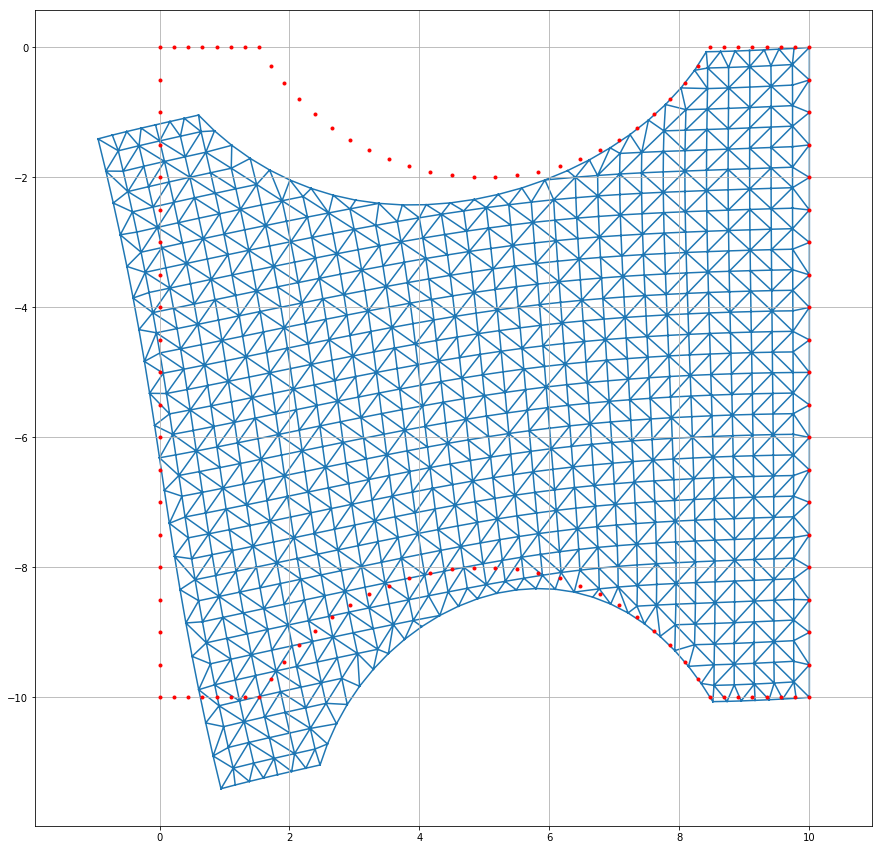

In [589]:
plt.figure(figsize=(15, 15))
plt.triplot(ResNodes[:, 0], ResNodes[:, 1], simplices)
plt.plot(border[:,0], border[:,1], '.r')


plt.axis('equal')
plt.grid(True)

In [590]:
# Перемещение для одного элемента
Ue = U[EFT, None]
Ue.shape

(1638, 6, 1)

In [591]:
Eps = np.matmul(B, Ue)
Eps[0], Eps.shape

(array([[-0.00462271],
        [ 0.        ],
        [ 0.00510341]]), (1638, 3, 1))

In [592]:
Sig = np.matmul(D, Eps)

(-1.4933897599458295,
 10.547304274283139,
 -11.976697384982277,
 0.5703189230943941)

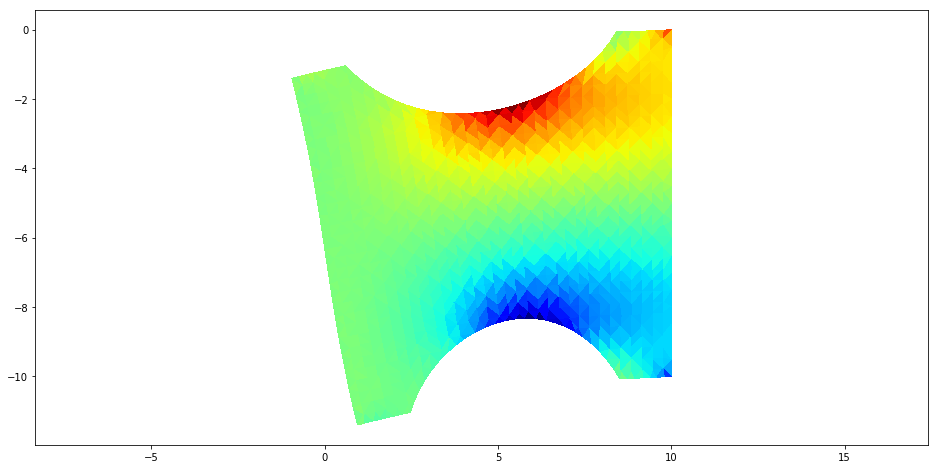

In [593]:
plt.figure(figsize=(16,8))
plt.tripcolor(ResNodes[:,0], ResNodes[:, 1], simplices, Sig[:,0].ravel(), cmap='jet')
plt.axis('equal')

In [594]:
NodeA = np.zeros((Nn,1))
NodeSig = np.zeros((Nn,3))
for i, e in enumerate(simplices):
    NodeSig[e] += Sig[i].T*A[i]
    NodeA[e] += A[i]
NodeSig /= NodeA

(-1.4933897599458295,
 10.547304274283139,
 -11.976697384982277,
 0.5703189230943941)

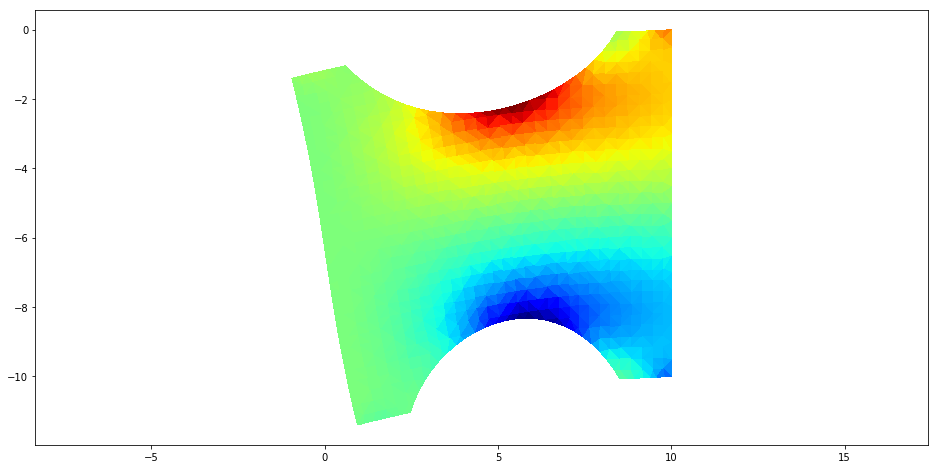

In [595]:
plt.figure(figsize=(16,8))
plt.tripcolor(ResNodes[:,0], ResNodes[:, 1], simplices, NodeSig[:,0].ravel(), cmap='jet')
plt.axis('equal')

In [596]:
NodeS1 = 0.5*(NodeSig[:,0]+NodeSig[:,1])+\
         np.sqrt((0.5*(NodeSig[:,0]-NodeSig[:,1]))**2+NodeSig[:,2]**2)

(-1.4933897599458295,
 10.547304274283139,
 -11.976697384982277,
 0.5703189230943941)

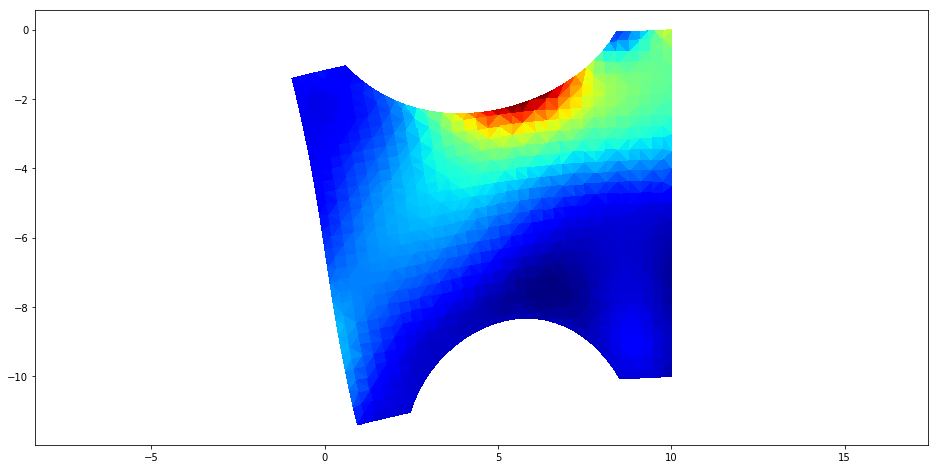

In [597]:
plt.figure(figsize=(16,8))
plt.tripcolor(ResNodes[:,0], ResNodes[:, 1], simplices, NodeS1.ravel(), cmap='jet')
plt.axis('equal')

In [598]:
i_max = np.argmax(np.abs(NodeS1))
i_max

8

In [614]:
i_min = np.argmin(NodeS1)
i_min

750

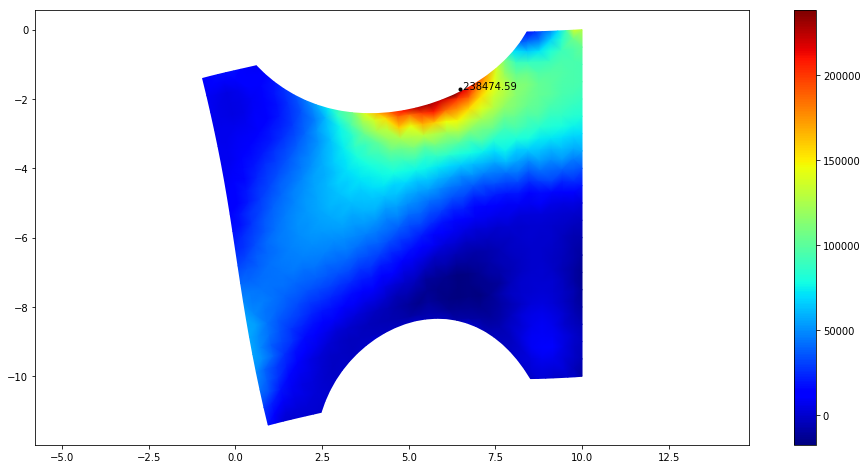

In [599]:
plt.figure(figsize=(16,8))
handle = plt.tripcolor(ResNodes[:,0], ResNodes[:, 1], simplices, NodeS1.ravel(), cmap='jet', shading='gouraud')
plt.plot(Nodes[i_max,0], Nodes[i_max,1], '.k')
plt.text(Nodes[i_max,0], Nodes[i_max,1], ' %.2f'%NodeS1[i_max])
plt.axis('equal')
plt.gcf().colorbar(handle)

(-0.9460854856626946, 10.000000000000002, -11.406378461887881, 0.0)

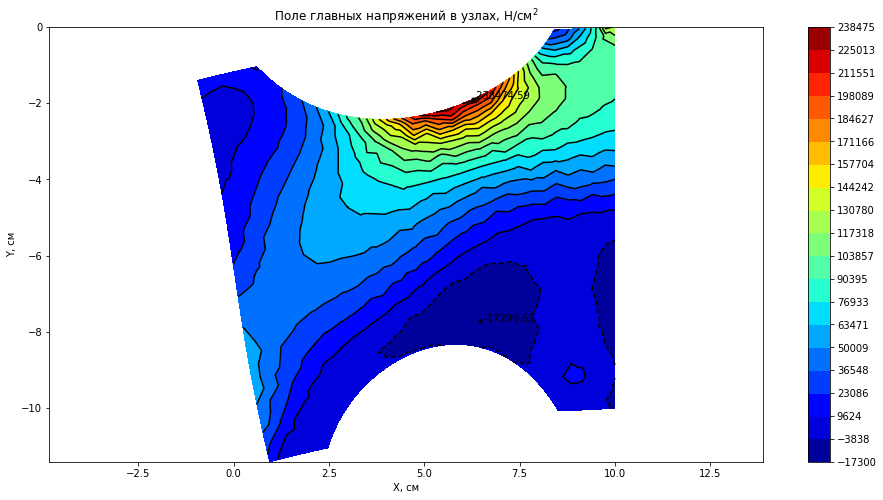

In [626]:
plt.figure(figsize=(16,8))
levels = np.linspace(NodeS1[i_min], NodeS1[i_max], 20)
handle = plt.tricontourf(ResNodes[:,0], ResNodes[:, 1], simplices, NodeS1.ravel(), cmap='jet',levels=levels)
plt.tricontour(ResNodes[:, 0], ResNodes[:, 1], simplices, 
              NodeS1.ravel(), colors='k', levels=levels)
plt.plot(ResNodes[i_max,0], ResNodes[i_max,1], '.k')
plt.text(ResNodes[i_max,0], ResNodes[i_max,1], ' %.2f'%NodeS1[i_max])
plt.plot(ResNodes[i_min,0], ResNodes[i_min,1], '.k')
plt.text(ResNodes[i_min,0], ResNodes[i_min,1], ' %.2f'%NodeS1[i_min])
cb = plt.gcf().colorbar(handle)
cb.set_ticks(levels)
plt.title('Поле главных напряжений в узлах, Н/см$^2$')
plt.xlabel('X, см')
plt.ylabel('Y, см')
plt.axis('equal')

In [619]:
newNodeS1 = np.abs(NodeS1)

(-0.9460854856626946, 10.000000000000002, -11.406378461887881, 0.0)

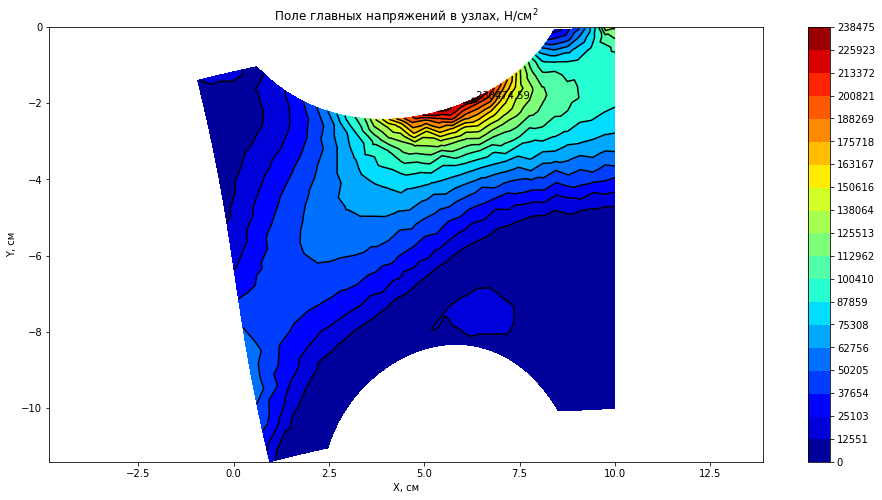

In [625]:
plt.figure(figsize=(16,8))
levels = np.linspace(0, newNodeS1[i_max], 20)
handle = plt.tricontourf(ResNodes[:,0], ResNodes[:, 1], simplices, newNodeS1.ravel(), cmap='jet',levels=levels)
plt.tricontour(ResNodes[:, 0], ResNodes[:, 1], simplices, 
              newNodeS1.ravel(), colors='k', levels=levels)
plt.plot(ResNodes[i_max,0], ResNodes[i_max,1], '.k')
plt.text(ResNodes[i_max,0], ResNodes[i_max,1], ' %.2f'%newNodeS1[i_max])
cb = plt.gcf().colorbar(handle)
cb.set_ticks(levels)
plt.title('Поле главных напряжений в узлах, Н/см$^2$')
plt.xlabel('X, см')
plt.ylabel('Y, см')
plt.axis('equal')